##### Reference links
> https://medium.com/dunder-data/create-a-bar-chart-race-animation-in-python-with-matplotlib-477ed1590096
<br>
> https://medium.com/@suryadayn/error-requested-moviewriter-ffmpeg-not-available-easy-fix-9d1890a487d3
<br>
##### Download ffmpeg file
> https://www.gyan.dev/ffmpeg/builds/packages/ffmpeg-4.3.1-2020-10-28-full_build.7z

In [1]:
import pandas as pd
from datetime import datetime, date

In [2]:
df = pd.read_csv('data_preprocessing/general_nation_province_year.csv', index_col=0)
df.count()

Ma_Tinh         528
So_Diem_Chay    528
Nam             528
dtype: int64

In [3]:
df.head()

,Ma_Tinh,So_Diem_Chay,Nam
0,62,1460,2011
1,64,1082,2011
2,66,926,2011
3,40,612,2011
4,11,578,2011


In [4]:
df_pivot = df.pivot(index='Nam', columns='Ma_Tinh', values='So_Diem_Chay')
df_pivot

Ma_Tinh,1,2,4,6,8,10,11,12,14,15,...,84,86,87,89,91,92,93,94,95,96
Nam,,,,,,,,,,,,,,,,,,,,,
2011,NaN,34.0,35.0,71.0,49.0,10.0,578.0,227.0,326.0,42.0,...,NaN,NaN,2.0,6.0,13.0,NaN,1.0,NaN,NaN,NaN
2012,NaN,72.0,81.0,148.0,87.0,82.0,1567.0,1102.0,1055.0,91.0,...,NaN,NaN,4.0,1.0,35.0,NaN,NaN,NaN,NaN,4.0
2013,1.0,46.0,73.0,101.0,72.0,30.0,996.0,394.0,500.0,83.0,...,NaN,NaN,5.0,NaN,13.0,NaN,NaN,NaN,NaN,14.0
2014,2.0,50.0,66.0,59.0,71.0,80.0,1706.0,1078.0,974.0,122.0,...,NaN,NaN,NaN,9.0,15.0,NaN,2.0,1.0,NaN,3.0
2015,1.0,119.0,115.0,134.0,148.0,61.0,1013.0,372.0,712.0,117.0,...,NaN,NaN,7.0,12.0,71.0,NaN,1.0,NaN,NaN,27.0
2016,4.0,43.0,273.0,270.0,61.0,83.0,1076.0,397.0,928.0,87.0,...,NaN,NaN,11.0,20.0,45.0,NaN,1.0,4.0,1.0,22.0
2017,203.0,445.0,303.0,343.0,483.0,299.0,2981.0,1268.0,1843.0,303.0,...,103.0,24.0,442.0,1093.0,622.0,45.0,83.0,142.0,116.0,195.0
2018,420.0,1740.0,1919.0,1117.0,1649.0,1654.0,29281.0,9149.0,20648.0,1230.0,...,583.0,637.0,8036.0,9088.0,11711.0,4526.0,3131.0,2145.0,1132.0,582.0
2019,204.0,1650.0,1158.0,1013.0,1945.0,2089.0,58974.0,22686.0,42702.0,2189.0,...,714.0,963.0,12251.0,13744.0,17981.0,5414.0,4325.0,3256.0,1460.0,1412.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

<BarContainer object of 63 artists>

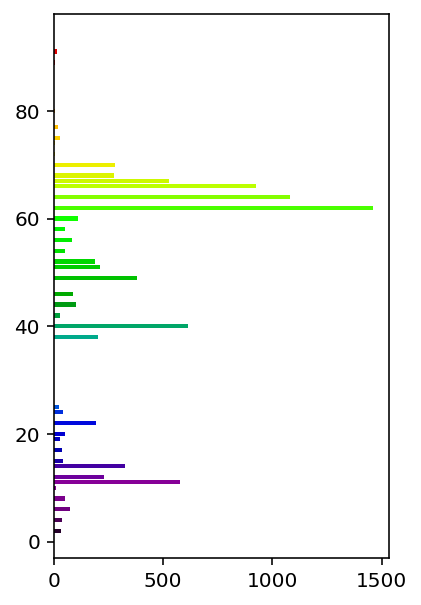

In [6]:
row = df_pivot.iloc[0]
NUM_COLORS = len(df_pivot.columns)
cm = plt.get_cmap('nipy_spectral')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
fig, ax = plt.subplots(figsize=(3, 5), dpi=144)
y = row.index
width = row.values
ax.barh(y=y, width=width, color=colors)

In [7]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]

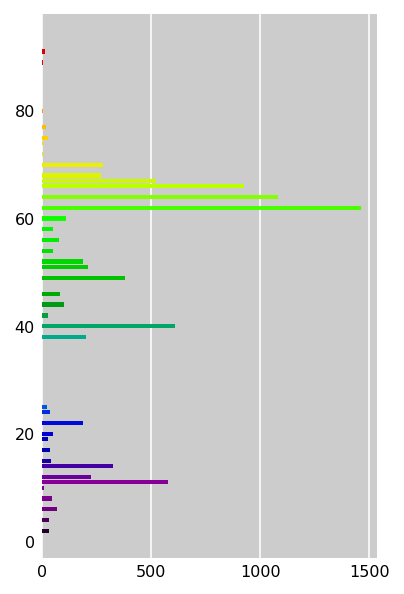

In [8]:
nice_axes(ax)
fig

In [9]:
df_pivot = df_pivot.reset_index()
df_pivot.index = df_pivot.index * 5
df_pivot

Ma_Tinh,Nam,1,2,4,6,8,10,11,12,14,...,84,86,87,89,91,92,93,94,95,96
0,2011,NaN,34.0,35.0,71.0,49.0,10.0,578.0,227.0,326.0,...,NaN,NaN,2.0,6.0,13.0,NaN,1.0,NaN,NaN,NaN
5,2012,NaN,72.0,81.0,148.0,87.0,82.0,1567.0,1102.0,1055.0,...,NaN,NaN,4.0,1.0,35.0,NaN,NaN,NaN,NaN,4.0
10,2013,1.0,46.0,73.0,101.0,72.0,30.0,996.0,394.0,500.0,...,NaN,NaN,5.0,NaN,13.0,NaN,NaN,NaN,NaN,14.0
15,2014,2.0,50.0,66.0,59.0,71.0,80.0,1706.0,1078.0,974.0,...,NaN,NaN,NaN,9.0,15.0,NaN,2.0,1.0,NaN,3.0
20,2015,1.0,119.0,115.0,134.0,148.0,61.0,1013.0,372.0,712.0,...,NaN,NaN,7.0,12.0,71.0,NaN,1.0,NaN,NaN,27.0
25,2016,4.0,43.0,273.0,270.0,61.0,83.0,1076.0,397.0,928.0,...,NaN,NaN,11.0,20.0,45.0,NaN,1.0,4.0,1.0,22.0
30,2017,203.0,445.0,303.0,343.0,483.0,299.0,2981.0,1268.0,1843.0,...,103.0,24.0,442.0,1093.0,622.0,45.0,83.0,142.0,116.0,195.0
35,2018,420.0,1740.0,1919.0,1117.0,1649.0,1654.0,29281.0,9149.0,20648.0,...,583.0,637.0,8036.0,9088.0,11711.0,4526.0,3131.0,2145.0,1132.0,582.0
40,2019,204.0,1650.0,1158.0,1013.0,1945.0,2089.0,58974.0,22686.0,42702.0,...,714.0,963.0,12251.0,13744.0,17981.0,5414.0,4325.0,3256.0,1460.0,1412.0
45,2020,43.0,320.0,276.0,113.0,254.0,254.0,3693.0,893.0,2760.0,...,27.0,238.0,2915.0,1376.0,1653.0,1334.0,121.0,195.0,137.0,478.0


In [10]:
last_idx = df_pivot.index[-1] + 1
df_expanded = df_pivot.reindex(range(last_idx))
labels = df_expanded.columns
df_expanded

Ma_Tinh,Nam,1,2,4,6,8,10,11,12,14,...,84,86,87,89,91,92,93,94,95,96
0,2011.0,NaN,34.0,35.0,71.0,49.0,10.0,578.0,227.0,326.0,...,NaN,NaN,2.0,6.0,13.0,NaN,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012.0,NaN,72.0,81.0,148.0,87.0,82.0,1567.0,1102.0,1055.0,...,NaN,NaN,4.0,1.0,35.0,NaN,NaN,NaN,NaN,4.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_expanded['Nam'] = df_expanded['Nam'].fillna(method='ffill')
df_expanded = df_expanded.set_index('Nam')
df_expanded

Ma_Tinh,1,2,4,6,8,10,11,12,14,15,...,84,86,87,89,91,92,93,94,95,96
Nam,,,,,,,,,,,,,,,,,,,,,
2011.0,NaN,34.0,35.0,71.0,49.0,10.0,578.0,227.0,326.0,42.0,...,NaN,NaN,2.0,6.0,13.0,NaN,1.0,NaN,NaN,NaN
2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.0,NaN,72.0,81.0,148.0,87.0,82.0,1567.0,1102.0,1055.0,91.0,...,NaN,NaN,4.0,1.0,35.0,NaN,NaN,NaN,NaN,4.0
2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_expanded = df_expanded.interpolate()
df_expanded

Ma_Tinh,1,2,4,6,8,10,11,12,14,15,...,84,86,87,89,91,92,93,94,95,96
Nam,,,,,,,,,,,,,,,,,,,,,
2011.0,NaN,34.0,35.0,71.0,49.0,10.0,578.0,227.0,326.0,42.0,...,NaN,NaN,2.0,6.0,13.0,NaN,1.000000,NaN,NaN,NaN
2011.0,NaN,41.6,44.2,86.4,56.6,24.4,775.8,402.0,471.8,51.8,...,NaN,NaN,2.4,5.0,17.4,NaN,1.066667,NaN,NaN,NaN
2011.0,NaN,49.2,53.4,101.8,64.2,38.8,973.6,577.0,617.6,61.6,...,NaN,NaN,2.8,4.0,21.8,NaN,1.133333,NaN,NaN,NaN
2011.0,NaN,56.8,62.6,117.2,71.8,53.2,1171.4,752.0,763.4,71.4,...,NaN,NaN,3.2,3.0,26.2,NaN,1.200000,NaN,NaN,NaN
2011.0,NaN,64.4,71.8,132.6,79.4,67.6,1369.2,927.0,909.2,81.2,...,NaN,NaN,3.6,2.0,30.6,NaN,1.266667,NaN,NaN,NaN
2012.0,NaN,72.0,81.0,148.0,87.0,82.0,1567.0,1102.0,1055.0,91.0,...,NaN,NaN,4.0,1.0,35.0,NaN,1.333333,NaN,NaN,4.0
2012.0,NaN,66.8,79.4,138.6,84.0,71.6,1452.8,960.4,944.0,89.4,...,NaN,NaN,4.2,1.8,30.6,NaN,1.400000,NaN,NaN,6.0
2012.0,NaN,61.6,77.8,129.2,81.0,61.2,1338.6,818.8,833.0,87.8,...,NaN,NaN,4.4,2.6,26.2,NaN,1.466667,NaN,NaN,8.0
2012.0,NaN,56.4,76.2,119.8,78.0,50.8,1224.4,677.2,722.0,86.2,...,NaN,NaN,4.6,3.4,21.8,NaN,1.533333,NaN,NaN,10.0


In [13]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded

Ma_Tinh,1,2,4,6,8,10,11,12,14,15,...,84,86,87,89,91,92,93,94,95,96
Nam,,,,,,,,,,,,,,,,,,,,,
2011.0,NaN,16.0,17.0,25.0,21.0,9.0,40.0,34.0,37.0,20.0,...,NaN,NaN,4.0,8.0,10.0,NaN,3.0,NaN,NaN,NaN
2011.0,NaN,18.0,19.0,26.0,24.0,12.0,41.0,37.0,38.0,21.0,...,NaN,NaN,4.0,5.0,9.0,NaN,2.0,NaN,NaN,NaN
2011.0,NaN,17.0,20.0,27.0,24.0,16.0,43.0,39.0,40.0,23.0,...,NaN,NaN,4.0,5.0,9.0,NaN,2.0,NaN,NaN,NaN
2011.0,NaN,19.0,21.0,29.0,25.0,17.0,43.0,39.0,40.0,24.0,...,NaN,NaN,5.0,4.0,9.0,NaN,2.0,NaN,NaN,NaN
2011.0,NaN,19.0,23.0,29.0,24.0,20.0,43.0,42.0,41.0,25.0,...,NaN,NaN,5.0,4.0,11.0,NaN,2.0,NaN,NaN,NaN
2012.0,NaN,21.0,23.0,32.0,26.0,25.0,45.0,44.0,43.0,27.0,...,NaN,NaN,6.0,3.0,15.0,NaN,4.0,NaN,NaN,7.0
2012.0,NaN,20.0,24.0,32.0,26.0,22.0,45.0,44.0,43.0,27.0,...,NaN,NaN,6.0,4.0,13.0,NaN,2.0,NaN,NaN,9.0
2012.0,NaN,20.0,23.0,32.0,26.0,19.0,45.0,43.0,44.0,28.0,...,NaN,NaN,6.0,4.0,12.0,NaN,2.0,NaN,NaN,9.0
2012.0,NaN,20.0,24.0,32.0,25.0,18.0,45.0,41.0,43.0,26.0,...,NaN,NaN,6.0,4.0,12.0,NaN,2.0,NaN,NaN,10.0


In [14]:
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded

Ma_Tinh,1,2,4,6,8,10,11,12,14,15,...,84,86,87,89,91,92,93,94,95,96
Nam,,,,,,,,,,,,,,,,,,,,,
2011.0,NaN,16.0,17.0,25.0,21.0,9.0,40.0,34.0,37.0,20.0,...,NaN,NaN,4.0,8.0,10.0,NaN,3.0,NaN,NaN,NaN
2011.0,NaN,18.0,19.0,26.0,24.0,12.0,41.0,37.0,38.0,21.0,...,NaN,NaN,4.0,5.0,9.0,NaN,2.0,NaN,NaN,NaN
2011.0,NaN,17.0,20.0,27.0,24.0,16.0,43.0,39.0,40.0,23.0,...,NaN,NaN,4.0,5.0,9.0,NaN,2.0,NaN,NaN,NaN
2011.0,NaN,19.0,21.0,29.0,25.0,17.0,43.0,39.0,40.0,24.0,...,NaN,NaN,5.0,4.0,9.0,NaN,2.0,NaN,NaN,NaN
2011.0,NaN,19.0,23.0,29.0,24.0,20.0,43.0,42.0,41.0,25.0,...,NaN,NaN,5.0,4.0,11.0,NaN,2.0,NaN,NaN,NaN
2012.0,NaN,21.0,23.0,32.0,26.0,25.0,45.0,44.0,43.0,27.0,...,NaN,NaN,6.0,3.0,15.0,NaN,4.0,NaN,NaN,7.0
2012.0,NaN,20.0,24.0,32.0,26.0,22.0,45.0,44.0,43.0,27.0,...,NaN,NaN,6.0,4.0,13.0,NaN,2.0,NaN,NaN,9.0
2012.0,NaN,20.0,23.0,32.0,26.0,19.0,45.0,43.0,44.0,28.0,...,NaN,NaN,6.0,4.0,12.0,NaN,2.0,NaN,NaN,9.0
2012.0,NaN,20.0,24.0,32.0,25.0,18.0,45.0,41.0,43.0,26.0,...,NaN,NaN,6.0,4.0,12.0,NaN,2.0,NaN,NaN,10.0


In [15]:
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

In [16]:
def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    row = df_expanded.iloc[i]
    y = row.index
    width = row.values
    barh = ax.barh(y=y, width=width, color=colors, tick_label=labels[1:])
    date_str = date(int(df_expanded.index[i]), 1, 1).strftime('%Y')
    ax.set_title(f'Fire Forest - {date_str}', fontsize='smaller')
    return barh
    
fig = plt.Figure(figsize=(3, 15), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(
    fig=fig, 
    func=update, 
    init_func=init,
    frames=df_expanded.shape[0]
)

In [17]:
html = anim.to_html5_video()
HTML(html)

In [18]:
anim.save('media/covid19.mp4')

In [19]:
df_pivot.head(5)

Ma_Tinh,Nam,1,2,4,6,8,10,11,12,14,...,84,86,87,89,91,92,93,94,95,96
0,2011,NaN,34.0,35.0,71.0,49.0,10.0,578.0,227.0,326.0,...,NaN,NaN,2.0,6.0,13.0,NaN,1.0,NaN,NaN,NaN
5,2012,NaN,72.0,81.0,148.0,87.0,82.0,1567.0,1102.0,1055.0,...,NaN,NaN,4.0,1.0,35.0,NaN,NaN,NaN,NaN,4.0
10,2013,1.0,46.0,73.0,101.0,72.0,30.0,996.0,394.0,500.0,...,NaN,NaN,5.0,NaN,13.0,NaN,NaN,NaN,NaN,14.0
15,2014,2.0,50.0,66.0,59.0,71.0,80.0,1706.0,1078.0,974.0,...,NaN,NaN,NaN,9.0,15.0,NaN,2.0,1.0,NaN,3.0
20,2015,1.0,119.0,115.0,134.0,148.0,61.0,1013.0,372.0,712.0,...,NaN,NaN,7.0,12.0,71.0,NaN,1.0,NaN,NaN,27.0


In [27]:
df_province = pd.read_csv('data_preprocessing/Tinh_Forest.csv', index_col=0)
df_province.head(5)

,Code,Name
0,89,An Giang
1,24,Bắc Giang
2,6,Bắc Kạn
3,95,Bạc Liêu
4,27,Bắc Ninh


In [36]:
dict_province = {}
for index in range(df_province.shape[0]):
    row = df_province.iloc[index]
    dict_province[row.values[0]] = row.values[1]
dict_province

{89: 'An Giang',
 24: 'Bắc Giang',
 6: 'Bắc Kạn',
 95: 'Bạc Liêu',
 27: 'Bắc Ninh',
 77: 'Bà Rịa-Vũng Tàu',
 83: 'Bến Tre',
 52: 'Bình Định',
 74: 'Bình Dương',
 70: 'Bình Phước',
 60: 'Bình Thuận',
 96: 'Cà Mau',
 92: 'Cần Thơ',
 4: 'Cao Bằng',
 66: 'Đắk Lắk',
 67: 'Đắk Nông',
 48: 'Đà Nẵng',
 11: 'Điện Biên',
 75: 'Đồng Nai',
 87: 'Đồng Tháp',
 64: 'Gia Lai',
 2: 'Hà Giang',
 30: 'Hải Dương',
 31: 'Hải Phòng',
 35: 'Hà Nam',
 1: 'Hà Nội',
 42: 'Hà Tĩnh',
 93: 'Hậu Giang',
 17: 'Hòa Bình',
 79: 'Hồ Chí Minh',
 33: 'Hưng Yên',
 56: 'Khánh Hòa',
 91: 'Kiên Giang',
 62: 'Kon Tum',
 12: 'Lai Châu',
 68: 'Lâm Đồng',
 20: 'Lạng Sơn',
 10: 'Lào Cai',
 80: 'Long An',
 36: 'Nam Định',
 40: 'Nghệ An',
 37: 'Ninh Bình',
 58: 'Ninh Thuận',
 25: 'Phú Thọ',
 54: 'Phú Yên',
 44: 'Quảng Bình',
 49: 'Quảng Nam',
 51: 'Quảng Ngãi',
 22: 'Quảng Ninh',
 45: 'Quảng Trị',
 94: 'Sóc Trăng',
 14: 'Sơn La',
 72: 'Tây Ninh',
 34: 'Thái Bình',
 19: 'Thái Nguyên',
 38: 'Thanh Hoá',
 46: 'Thừa Thiên Huế',
 82: 'T

In [37]:
df_pivot.rename(columns=dict_province)

Ma_Tinh,Nam,Hà Nội,Hà Giang,Cao Bằng,Bắc Kạn,Tuyên Quang,Lào Cai,Điện Biên,Lai Châu,Sơn La,...,Trà Vinh,Vĩnh Long,Đồng Tháp,An Giang,Kiên Giang,Cần Thơ,Hậu Giang,Sóc Trăng,Bạc Liêu,Cà Mau
0,2011,NaN,34.0,35.0,71.0,49.0,10.0,578.0,227.0,326.0,...,NaN,NaN,2.0,6.0,13.0,NaN,1.0,NaN,NaN,NaN
5,2012,NaN,72.0,81.0,148.0,87.0,82.0,1567.0,1102.0,1055.0,...,NaN,NaN,4.0,1.0,35.0,NaN,NaN,NaN,NaN,4.0
10,2013,1.0,46.0,73.0,101.0,72.0,30.0,996.0,394.0,500.0,...,NaN,NaN,5.0,NaN,13.0,NaN,NaN,NaN,NaN,14.0
15,2014,2.0,50.0,66.0,59.0,71.0,80.0,1706.0,1078.0,974.0,...,NaN,NaN,NaN,9.0,15.0,NaN,2.0,1.0,NaN,3.0
20,2015,1.0,119.0,115.0,134.0,148.0,61.0,1013.0,372.0,712.0,...,NaN,NaN,7.0,12.0,71.0,NaN,1.0,NaN,NaN,27.0
25,2016,4.0,43.0,273.0,270.0,61.0,83.0,1076.0,397.0,928.0,...,NaN,NaN,11.0,20.0,45.0,NaN,1.0,4.0,1.0,22.0
30,2017,203.0,445.0,303.0,343.0,483.0,299.0,2981.0,1268.0,1843.0,...,103.0,24.0,442.0,1093.0,622.0,45.0,83.0,142.0,116.0,195.0
35,2018,420.0,1740.0,1919.0,1117.0,1649.0,1654.0,29281.0,9149.0,20648.0,...,583.0,637.0,8036.0,9088.0,11711.0,4526.0,3131.0,2145.0,1132.0,582.0
40,2019,204.0,1650.0,1158.0,1013.0,1945.0,2089.0,58974.0,22686.0,42702.0,...,714.0,963.0,12251.0,13744.0,17981.0,5414.0,4325.0,3256.0,1460.0,1412.0
45,2020,43.0,320.0,276.0,113.0,254.0,254.0,3693.0,893.0,2760.0,...,27.0,238.0,2915.0,1376.0,1653.0,1334.0,121.0,195.0,137.0,478.0
